In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/us-historical-stock-prices-with-earnings-data/dataset_summary.csv
/kaggle/input/us-historical-stock-prices-with-earnings-data/stocks_latest/dividends_latest.csv
/kaggle/input/us-historical-stock-prices-with-earnings-data/stocks_latest/earnings_latest.csv
/kaggle/input/us-historical-stock-prices-with-earnings-data/stocks_latest/stock_prices_latest.csv


In [2]:
df = pd.read_csv("/kaggle/input/us-historical-stock-prices-with-earnings-data/stocks_latest/stock_prices_latest.csv")
df

,symbol,date,open,high,low,close,close_adjusted,volume,split_coefficient
0,MSFT,2016-05-16,50.800,51.96,50.7500,51.83,49.7013,20032017,1.0
1,MSFT,2002-01-16,68.850,69.84,67.8500,67.87,22.5902,30977700,1.0
2,MSFT,2001-09-18,53.410,55.00,53.1700,54.32,18.0802,41591300,1.0
3,MSFT,2007-10-26,36.010,36.03,34.5600,35.03,27.2232,288121200,1.0
4,MSFT,2014-06-27,41.610,42.29,41.5100,42.25,38.6773,74640000,1.0
...,...,...,...,...,...,...,...,...,...
24395011,HA,2021-06-03,25.510,26.19,24.9389,25.92,25.9200,1287065,1.0
24395012,HA,2021-06-04,26.160,26.69,25.9400,26.04,26.0400,993843,1.0
24395013,HA,2021-06-10,29.790,29.97,26.1100,26.20,26.2000,2402349,1.0
24395014,HA,2021-06-07,26.210,26.35,25.7400,26.00,26.0000,514048,1.0


In [31]:
stocks = df.symbol.value_counts()[:4].index

In [32]:
%%time
df_highest = df[df["symbol"].apply(lambda x: x in stocks)]

CPU times: user 21.1 s, sys: 308 ms, total: 21.4 s
Wall time: 21.4 s


In [33]:
df_highest["date"] = df_highest["date"].apply(lambda x: pd.to_datetime(x))
df_highest = df_highest.reset_index()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [35]:
df_highest

,index,symbol,date,open,high,low,close,close_adjusted,volume,split_coefficient
0,2045523,CWBC,2015-05-15,6.750,6.790,6.750,6.770,6.4946,3172,1.0
1,2045524,CWBC,2016-01-07,7.020,7.170,6.954,7.170,6.9383,1448,1.0
2,2045525,CWBC,2013-05-06,4.790,4.790,4.630,4.789,4.5328,2000,1.0
3,2045526,CWBC,2005-06-17,12.150,12.150,12.150,12.150,10.8934,500,1.0
4,2045527,CWBC,2009-02-04,3.605,3.605,3.605,3.605,3.4121,500,1.0
...,...,...,...,...,...,...,...,...,...,...
23595,24393893,FSTR,2021-06-11,18.370,18.486,17.730,17.990,17.9900,51925,1.0
23596,24393894,FSTR,2021-06-08,19.100,19.390,18.980,19.360,19.3600,49936,1.0
23597,24393895,FSTR,2021-06-03,18.240,18.490,17.940,18.460,18.4600,31394,1.0
23598,24393896,FSTR,2021-06-09,19.310,19.340,18.880,19.050,19.0500,46993,1.0


In [37]:
df_highest.symbol.value_counts()

CWCO    5900
CWBC    5900
EFOI    5900
FSTR    5900
Name: symbol, dtype: int64

In [36]:
df_highest.sort_values(["symbol", "date"])

,index,symbol,date,open,high,low,close,close_adjusted,volume,split_coefficient
19423,19609261,CWBC,1998-01-02,19.000,19.000,19.00,19.00,7.9948,300,1.0
19400,19609238,CWBC,1998-01-05,19.000,19.250,19.00,19.00,7.9948,1200,1.0
19315,19609153,CWBC,1998-01-06,18.500,19.500,18.50,19.50,8.2052,800,1.0
19182,19609020,CWBC,1998-01-07,18.500,18.500,18.50,18.50,7.7844,500,1.0
19565,19609403,CWBC,1998-01-08,19.000,19.500,18.50,18.50,7.7844,1600,1.0
...,...,...,...,...,...,...,...,...,...,...
23596,24393894,FSTR,2021-06-08,19.100,19.390,18.98,19.36,19.3600,49936,1.0
23598,24393896,FSTR,2021-06-09,19.310,19.340,18.88,19.05,19.0500,46993,1.0
23592,24393890,FSTR,2021-06-10,18.755,18.755,18.23,18.27,18.2700,39497,1.0
23595,24393893,FSTR,2021-06-11,18.370,18.486,17.73,17.99,17.9900,51925,1.0


<AxesSubplot:xlabel='date', ylabel='close'>

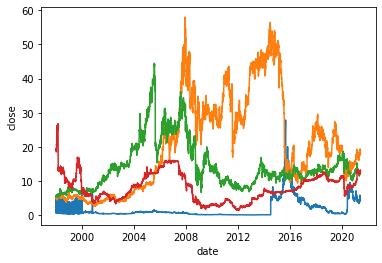

In [38]:
import seaborn as sns
sns.lineplot(x = "date", y = "close", data = df_highest[df_highest.symbol == "EFOI"])
sns.lineplot(x = "date", y = "close", data = df_highest[df_highest.symbol == "FSTR"])
sns.lineplot(x = "date", y = "close", data = df_highest[df_highest.symbol == "CWCO"])
sns.lineplot(x = "date", y = "close", data = df_highest[df_highest.symbol == "CWBC"])

In [17]:
df["symbol"].apply(lambda x: x in stocks)

0           False
1           False
2           False
3           False
4           False
            ...  
24395011    False
24395012    False
24395013    False
24395014    False
24395015    False
Name: symbol, Length: 24395016, dtype: bool